In [114]:
import pandas as pd
import numpy as np

In [115]:
pd.set_option('display.max_rows', None)


In [ ]:
df = pd.read_excel(
    '../../dati_dott_fedele/dataset_sintetico_ALERT.xlsx',
    sheet_name='Foglio1',  # Legge il foglio chiamato "Foglio1"
    usecols='D:V',         # Legge solo le colonne dalla A alla D
    skiprows=2,            # Salta la prima riga             # Legge solo 10 righe
)

In [117]:
df

,Age,Gender,fumatore?,ex-fumatore?,non-fumatore?,date_I,FC_I,SpO2_I,oxigen_therapy_I,6MWT_I,TC_I,alert_I,date_II,FC_II,SpO2_II,oxigen_therapy_II,6MWT_II,TC_II,alert_II
0,43,F,False,False,True,2024-06-04,104,94,no,False,36.0,GREEN,2024-06-05,91.0,99.0,venturi_mask,False,36.3,GREEN
1,79,M,False,True,False,2024-08-09,85,89,no,False,36.3,GREEN,2024-08-10,70.0,93.0,venturi_mask,False,36.0,YELLOW
2,81,M,True,False,False,2024-08-03,114,86,no,False,36.2,RED,2024-08-04,124.0,91.0,no,False,36.5,YELLOW
3,81,M,False,False,True,2024-08-15,92,86,no,False,36.5,RED,2024-08-16,120.0,92.0,ox,False,36.6,RED
4,48,F,False,False,True,2024-06-26,87,93,no,False,36.0,YELLOW,2024-06-27,97.0,95.0,venturi_mask,False,36.1,YELLOW
5,82,M,False,False,True,2024-02-01,78,86,no,False,36.0,RED,2024-02-02,121.0,92.0,ox,False,36.6,RED
6,72,M,False,False,True,2024-06-27,99,91,no,False,36.0,YELLOW,2024-06-28,68.0,98.0,no,False,36.0,GREEN
7,78,M,False,True,False,2024-07-15,81,97,no,False,36.0,GREEN,2024-07-16,70.0,95.0,no,False,36.3,GREEN
8,82,M,False,False,True,2024-03-23,74,86,no,False,36.2,RED,2024-03-24,123.0,90.0,ox,False,36.5,RED
9,81,M,False,False,True,2024-05-23,80,87,no,False,36.1,RED,2024-05-24,126.0,92.0,no,False,36.5,YELLOW


In [118]:
df.loc[df["alert_I"]=="YELLOW","alert_II"].count()

75

In [119]:
df.loc[(df["alert_I"] == "GREEN") & (df["alert_II"] == "YELLOW"),"alert_I"].count(),df.loc[(df["alert_I"] == "YELLOW") & (df["alert_II"] == "YELLOW"),"alert_I"].count(),df.loc[(df["alert_I"] == "RED") & (df["alert_II"] == "YELLOW"),"alert_I"].count()

(16, 8, 12)

In [120]:
df = df.drop(["date_I","date_II"], axis=1)

In [121]:
num_rows = df.shape[0]
age_sex_smoke = df.iloc[:,:5]

In [122]:
df_pt1 = df.iloc[:,:df.columns.get_loc("alert_I")+1]
df_pt2 = df.iloc[:,df.columns.get_loc("alert_I")+1:]

In [123]:
df_pt2 = pd.concat([age_sex_smoke,df_pt2], axis = 1)

In [124]:
cols = ["Age","Gender","fumatore?","ex-fumatore?","non-fumatore?","FC","SpO2","oxigen_therapy","6MWT","TC","alert"]
df_pt1.columns = cols
df_pt2.columns = cols

## Dati versione 1

In [125]:
df = pd.concat([df_pt1,df_pt2.drop(df_pt2[df_pt2.isna().any(axis=1)].index)])

In [126]:
df= df.reset_index()

In [127]:
df.shape

(600, 12)

In [128]:
df = df.drop(["index"],axis=1)
df

,Age,Gender,fumatore?,ex-fumatore?,non-fumatore?,FC,SpO2,oxigen_therapy,6MWT,TC,alert
0,43,F,False,False,True,104.0,94.0,no,False,36.0,GREEN
1,79,M,False,True,False,85.0,89.0,no,False,36.3,GREEN
2,81,M,True,False,False,114.0,86.0,no,False,36.2,RED
3,81,M,False,False,True,92.0,86.0,no,False,36.5,RED
4,48,F,False,False,True,87.0,93.0,no,False,36.0,YELLOW
5,82,M,False,False,True,78.0,86.0,no,False,36.0,RED
6,72,M,False,False,True,99.0,91.0,no,False,36.0,YELLOW
7,78,M,False,True,False,81.0,97.0,no,False,36.0,GREEN
8,82,M,False,False,True,74.0,86.0,no,False,36.2,RED
9,81,M,False,False,True,80.0,87.0,no,False,36.1,RED


In [25]:
df["fumatore?"] = ["True" if i == True else "False" for i in df["fumatore?"]]
df["ex-fumatore?"] = ["True" if i == True else "False" for i in df["ex-fumatore?"]]
df["non-fumatore?"] = ["True" if i == True else "False" for i in df["non-fumatore?"]]

In [129]:
df

,Age,Gender,fumatore?,ex-fumatore?,non-fumatore?,FC,SpO2,oxigen_therapy,6MWT,TC,alert
0,43,F,False,False,True,104.0,94.0,no,False,36.0,GREEN
1,79,M,False,True,False,85.0,89.0,no,False,36.3,GREEN
2,81,M,True,False,False,114.0,86.0,no,False,36.2,RED
3,81,M,False,False,True,92.0,86.0,no,False,36.5,RED
4,48,F,False,False,True,87.0,93.0,no,False,36.0,YELLOW
5,82,M,False,False,True,78.0,86.0,no,False,36.0,RED
6,72,M,False,False,True,99.0,91.0,no,False,36.0,YELLOW
7,78,M,False,True,False,81.0,97.0,no,False,36.0,GREEN
8,82,M,False,False,True,74.0,86.0,no,False,36.2,RED
9,81,M,False,False,True,80.0,87.0,no,False,36.1,RED


In [130]:
gender = df["Gender"]
df.drop(["Gender"],axis = 1, inplace=True)
df = pd.concat([gender,df],axis=1)

In [131]:
pd.set_option('display.max_rows', None)


In [132]:
df["6MWT"].unique()

array([False, True], dtype=object)

In [133]:
df.to_csv("../dati_dott_fedele/dati_m2_incolonnati.csv")

In [134]:
df.shape

(600, 11)

## Versione 2 dei dati

In [135]:
df_pt1.shape[0]

311

In [136]:
df_pt2.shape[0]

311

In [137]:
previous_alert = df_pt1["alert"]

In [138]:
df_pt1_v2 = df_pt1.copy()
df_pt2_v2 = df_pt2.copy()

In [139]:
df_pt2_v2.insert(5,"previous_alert",previous_alert)

In [140]:
df_pt2_v2.shape

(311, 12)

## Dati in versione ridotta per i test con un contesto definito

In [44]:
df_pt2_v3 = df_pt2_v2.copy() 

In [45]:
df_pt2_v3.drop(df_pt2_v3[df_pt2_v3.isna().any(axis=1)].index)

,Age,Gender,fumatore?,ex-fumatore?,non-fumatore?,previous_alert,FC,SpO2,oxigen_therapy,6MWT,TC,alert
0,43,F,False,False,True,GREEN,91.0,99.0,venturi_mask,False,36.3,GREEN
1,79,M,False,True,False,GREEN,70.0,93.0,venturi_mask,False,36.0,YELLOW
2,81,M,True,False,False,RED,124.0,91.0,no,False,36.5,YELLOW
3,81,M,False,False,True,RED,120.0,92.0,ox,False,36.6,RED
4,48,F,False,False,True,YELLOW,97.0,95.0,venturi_mask,False,36.1,YELLOW
5,82,M,False,False,True,RED,121.0,92.0,ox,False,36.6,RED
6,72,M,False,False,True,YELLOW,68.0,98.0,no,False,36.0,GREEN
7,78,M,False,True,False,GREEN,70.0,95.0,no,False,36.3,GREEN
8,82,M,False,False,True,RED,123.0,90.0,ox,False,36.5,RED
9,81,M,False,False,True,RED,126.0,92.0,no,False,36.5,YELLOW


In [46]:
df_v2.to_csv("../dati_dott_fedele/dati_m2_incolonnati_v3.csv")

In [141]:
previous_alert = ["BLANK" for i in range(df_pt1.shape[0])]

In [142]:
df_pt1_v2.insert(5,"previous_alert",previous_alert)

In [143]:
df_v2  = pd.concat([df_pt1_v2,df_pt2_v2.drop(df_pt2_v2[df_pt2_v2.isna().any(axis=1)].index)])

In [144]:
df_v2 = df_v2.reset_index(drop=True)
df_v2

,Age,Gender,fumatore?,ex-fumatore?,non-fumatore?,previous_alert,FC,SpO2,oxigen_therapy,6MWT,TC,alert
0,43,F,False,False,True,BLANK,104.0,94.0,no,False,36.0,GREEN
1,79,M,False,True,False,BLANK,85.0,89.0,no,False,36.3,GREEN
2,81,M,True,False,False,BLANK,114.0,86.0,no,False,36.2,RED
3,81,M,False,False,True,BLANK,92.0,86.0,no,False,36.5,RED
4,48,F,False,False,True,BLANK,87.0,93.0,no,False,36.0,YELLOW
5,82,M,False,False,True,BLANK,78.0,86.0,no,False,36.0,RED
6,72,M,False,False,True,BLANK,99.0,91.0,no,False,36.0,YELLOW
7,78,M,False,True,False,BLANK,81.0,97.0,no,False,36.0,GREEN
8,82,M,False,False,True,BLANK,74.0,86.0,no,False,36.2,RED
9,81,M,False,False,True,BLANK,80.0,87.0,no,False,36.1,RED


In [154]:
df_v2.loc[(df_v2["previous_alert"] != "BLANK") & (df_v2["alert"] == "YELLOW")].count()

Age               36
Gender            36
fumatore?         36
ex-fumatore?      36
non-fumatore?     36
previous_alert    36
FC                36
SpO2              36
oxigen_therapy    36
6MWT              36
TC                36
alert             36
dtype: int64

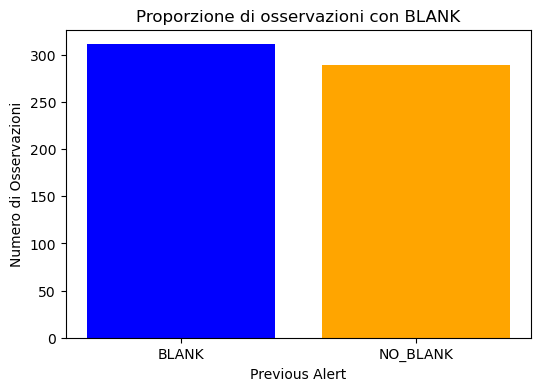

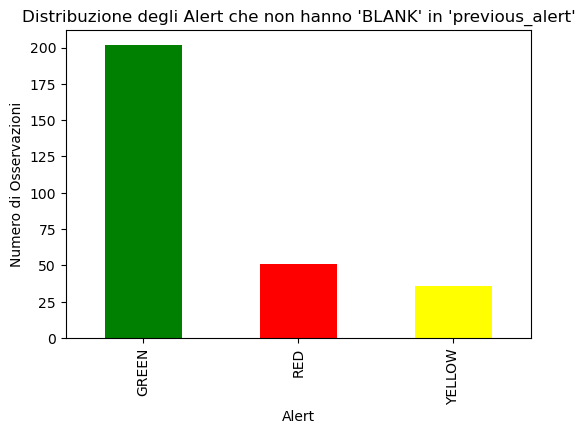

In [156]:
import pandas as pd
import matplotlib.pyplot as plt





# ✅ Istogramma 1: Proporzione delle osservazioni con BLANK
has_blank = (df_v2["previous_alert"] == "BLANK").sum()
no_blank = (df_v2["previous_alert"] != "BLANK").sum()

plt.figure(figsize=(6,4))
plt.bar(["BLANK", "NO_BLANK"], [has_blank, no_blank], color=["blue", "orange"])
plt.xlabel("Previous Alert")
plt.ylabel("Numero di Osservazioni")
plt.title("Proporzione di osservazioni con BLANK")
plt.savefig("proporzione_blank.png")
plt.show()

# ✅ Istogramma 2: Distribuzione degli alert per osservazioni senza BLANK
df_no_blank = df_v2[df_v2["previous_alert"] != "BLANK"]
alert_counts = df_no_blank["alert"].value_counts()

plt.figure(figsize=(6,4))
alert_counts.plot(kind="bar", color=["green", "red", "yellow"])
plt.xlabel("Alert")
plt.ylabel("Numero di Osservazioni")
plt.title("Distribuzione degli Alert che non hanno 'BLANK' in 'previous_alert'")
plt.savefig("distribuzione_alert.png")
plt.show()


In [109]:
df_v2.to_csv("../dati_dott_fedele/dati_m2_incolonnati_v2.csv")